<a href="https://colab.research.google.com/github/chacha715/graduate/blob/main/242STG21_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scientific Programming in Python - Control Flow & File IO

### Problem 1. FizzBuzz

>**(a)** Write a program that prints out the numbers between one and 100 except that:
* for multiples of three it prints the word Fizz instead of that number;
* for multiples of five it prints the word Buzz instead of that number; and
* for multiples of both three and five it prints the word FizzBuzz instead of that number.

>For example, the first 15 lines of output from your program should be identical to the following:

In [4]:
# Your code here

numbers = range(1, 100)

def fizzbuzz(numbers):
  for i in range(len(numbers)):
    val = numbers[i]

    if val % 3 == 0 and val % 5 == 0:
      print("FizzBuzz")
    elif val % 3 == 0:
      print("Fizz")
    elif val % 5 == 0:
      print("Buzz")
    else:
      print(val)

fizzbuzz(numbers[:15])

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


>**Hint:** If you are having trouble, start by writing code that will print all the numbers one to 100, one per line. Then, modify that code so that it prints the word Fizz instead of multiples of three. Next, modify your code to prints the word Buzz instead of multiples of five. Finally, modify it so that it prints the correct output.

>**Hint:** To test if a variable <code>n</code> is a multiple of three, you can use this code:

>><code>(n % 3) == 0</code>

> The <code>%</code> symbol here is called the [modulo operator](https://en.wikipedia.org/wiki/Modulo_operation) and the code <code>n % 3</code> is pronounced "n modulo three". So if <code>n</code> is zero modulo three, it gives 0 remainder on division by three and that means it’s a multiple of 3. You can use the code like this:

>><code>if (n % 3) == 0:
    do_stuff </code>

>Here, <code>do_stuff</code> will be executed if and only if <code>n</code> is a multiple of 3.

### Problem 2. Library with File I/O

In this problem, you are given a list of student names and library fees in a file and your task is to write some Python code to process it. Make sure you download [library_data.txt](http://ucl-cs-grad.github.io/scipython/notebooks/day2/library_data.txt) from the website and put it in the same folder as your iPython notebook. The file looks something like this:

Each line in the file is a single student record. Each student record has the following format:
><code>StudentNumber FirstName LastName AmountOwed</code>

>**(a)** Write a function that uses a for-loop to iterate over each line in the file and store it in a list. The resulting list should look something like this:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/석사/data') # working directory를 설정

Mounted at /content/drive


In [10]:
# Your code here

def read_data(text):
  data = []

  with open(text, "r") as f:
    for line in f:
      data.append(line)
  return data

lib_data = read_data("library_data.txt")
print(lib_data)

['123456 John Doe 1.49\n', '312314 Jane Miller 0.00\n', '531337 Ted Johnson 8.12\n', '273263 Johnny Depp 0.0\n', '102931 Fred Asteir 1.20\n', '391273 Sarah Connor 10.39\n']


>**(b)** Write a function to create two lists:
>1. A list that contains only the first column (the student number)
>2. A list that contains only the remaining information (the student name and the amount of money owed to the library)

>**Hint:** You could use the string method <code>split</code> to split a string into a list of smaller strings. Read the help for this function if needed.

In [11]:
# Your code here

def get_columns(lib_data):
  student_numbers = []
  remaining = []

  for info in lib_data:
    splits = info.split(" ")
    number = splits[0]
    student_numbers.append(number)

    rest = splits[1:]
    remaining.append(rest)

  return student_numbers, remaining

student_numbers, remaining = get_columns(lib_data)
print(student_numbers, remaining)

['123456', '312314', '531337', '273263', '102931', '391273'] [['John', 'Doe', '1.49\n'], ['Jane', 'Miller', '0.00\n'], ['Ted', 'Johnson', '8.12\n'], ['Johnny', 'Depp', '0.0\n'], ['Fred', 'Asteir', '1.20\n'], ['Sarah', 'Connor', '10.39\n']]


>**(c)** Write a function that splits the second list futher into two lists:
>1. A list that contains the name
>2. A list that contains the amount owed (as a float)

In [14]:
# Your code here

def get_names_owed(remaining):
  names = []
  oweds = []

  for rest in remaining:
    name = " ".join(rest[:2])
    names.append(name)

    owed = float(rest[2])
    oweds.append(owed)

  return names, oweds

names, oweds = get_names_owed(remaining)
print(names, oweds)

['John Doe', 'Jane Miller', 'Ted Johnson', 'Johnny Depp', 'Fred Asteir', 'Sarah Connor'] [1.49, 0.0, 8.12, 0.0, 1.2, 10.39]


>**(d)** Write a function that determines the name and student number of the person that owes the largest amount of money.

In [17]:
# Your code here

def name_number_money(oweds):
  m = 0
  idx = None

  for i in range (len(oweds)):
    if oweds[i] > m:
      idx = i
  return idx

idx_money = name_number_money(oweds)
print(names[idx_money], ", whose student number is", student_numbers[idx_money], ", owes the largest amount of money, which is ", oweds[idx_money])

Sarah Connor , whose student number is 391273 , owes the largest amount of money, which is  10.39


>**(e)** Write a function that determines the names and student numbers of all people that owe money (i.e. where the amount is not 0.00).

In [20]:
# Your code here

def find_money(names, oweds, student_numbers):
  owe_money = []

  for i in range (len(oweds)):
    if oweds[i] != 0:
      not_zero = []
      not_zero.append(names[i])
      not_zero.append(student_numbers[i])
      not_zero.append(oweds[i])

      owe_money.append(not_zero)

  return owe_money

print("Name of people that owe money, their student number and the amount of money they owe: ")
for i in find_money(names, oweds, student_numbers):
  print(i)

Name of people that owe money, their student numbers and the amount of money they owe: 
['John Doe', '123456', 1.49]
['Ted Johnson', '531337', 8.12]
['Fred Asteir', '102931', 1.2]
['Sarah Connor', '391273', 10.39]


>**(f)** We will now write our results to a new file. Write some code that:
> 1. lets the user enter a file name;
> 2. creates this file; and
> 3. writes to the file the list of people that owe money (e.g. one student per line, with how much they owe as well).

In [23]:
# Your code here

file_name = input("Enter a file name: ")

Enter a file name: assignment2_Pr2_(f).txt


In [25]:
owe_money = find_money(names, oweds, student_numbers)

def write_money(file_name, owe_money):
  with open(file_name, "w") as f:
    for not_zero in owe_money:
      record = ""

      for data in not_zero:
        record = record + str(data) + " "

      record = record + "\n"
      f.write(record)

write_money(file_name, owe_money)

### Problem 3. FizzBuzz (applied science version)

Imagine that you are doing a psychology experiment in which your colleague records the response time of participants presented with some task. There are two task conditions: condition A and condition B. There are n participants, and they each do the task with condition A and then with condition B. The instrument used to record the response times stores the information in a long text file called response_time.txt (which you can get [here](http://ucl-cs-grad.github.io/scipython/notebooks/day2/response_time.txt)). The first line of the file is the response time of the first participant doing the task with condition A, the second line is the response time of the first participant with condition B, the third line is the response time of the second participant doing the task with condition A, and so on.

>**(a)** Download [response_time.txt](http://ucl-cs-grad.github.io/scipython/notebooks/day2/response_time.txt) and then write a program which prints the mean response time of all participants for task A followed by the mean response time for all participants for task B. The output of your program should be the following:

>**Hint:** The modulo operator should come in handy again. Any appropriately indented code following <code> if (n % 2) == 0: </code> will only be executed if <code>n</code> is even.

In [31]:
# Your code here

def response_time(data):
  A, B = [], []

  with open(data, "r") as f:
    for i, j in enumerate(f):
      j = j.strip()

      if (i % 2) == 0:
        A.append(float(j))
      else:
        B.append(float(j))

  return A, B


def mean(l):
  return sum(l) / float(len(l))


condition_A, condition_B = response_time("response_time.txt")

print(round(mean(condition_A), 11), round(mean(condition_B), 9))

4.98704579795 3.104619569


>**(b)** Extend your script so that it displays a box plot of the response times of the participants for the two conditions.

>**Hint:**  If you create two lists, called <code>condition_A</code> and <code>condition_B</code>, containing the response times for conditions A and B respectively, then the <code>boxplot</code> function from matplotlib will generate the actual boxplot:
>><code>boxplot( [condition_A, condition_B] )</code>.

<function matplotlib.pyplot.show(close=None, block=None)>

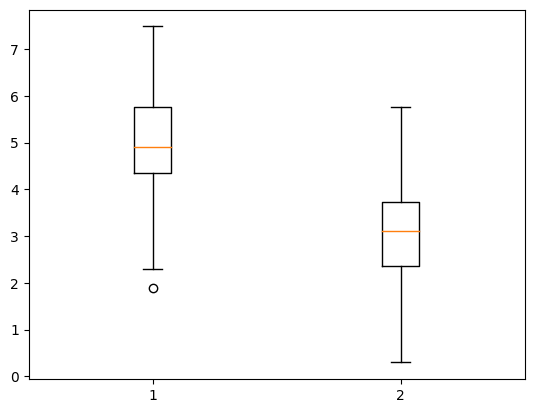

In [38]:
# Your code here

import matplotlib.pyplot as plt

boxplot = plt.boxplot( [condition_A, condition_B] )
plt.show

### Problem 4. Who’s the winner?

The London elections are around the corner and you have been tasked with writing the code that determines the winner given all the ballots. The winner is determined as follows:

* From the list of candidates (which we will for simplicity number $0,1,2,...$ ), every voter gets to select his first and his second choice. The data you are given can thus be represented as a list of lists:

><code>[ [1st_choice_voter_1, 2nd_choice_voter_1], [1st_choice_voter_2, 2nd_choice_voter_2], ...]</code>

* If any of the candidates gets more than 50% of the first votes, he is declared the winner.


* If no candidate achieves this absolute majority, the two candidates with the most first votes enter into a second round, all others are eliminated.  


* In the second round, all ballots with first votes for candidates that did not enter the second round are re-examined, and any second choice votes for the top two candidates are added to their scores.  


* The candidate with the highest number of combined first and second choice votes is the winner.  

>**(a)** Download the file [votes.pickle](ucl-cs-grad.github.io/scipython/notebooks/day2/votes.pickle) from the course website. Then, use the following code to read the list of votes from the file:

In [3]:
from pickle import *

votes = load( open("votes.pickle", "rb") )

>**(b)** Fill in the code required to count the first votes and to determine the possible first-round winner. There are 6 candidates in the given data set. You should find that in this data set no candidate wins in the first round.

In [37]:
num_candidates = 6

# create a list to store the number of votes per candidate
first_votes = [0] * num_candidates

# go through the list of votes and add up the first votes per candidate
for (first, second) in votes:
  first_votes[first] += 1

print(first_votes)

# in the first round, if any candidate has > 50% of the votes, he wins
for i in range(len(first_votes)):
  if first_votes[i] > (len(votes) / 2.0):
    print("We have a winner! Candidate " + str(i) + " with " + str(first_votes[i] > len(votes)) + "%")

print("There is no winner.. let's move on to the second round")

[10010, 26969, 23130, 4959, 14848, 20084]
There is no winner.. let's move on to the second round


>**(c)** Implement the second round process described above. If you do this correctly, you should find that candidate 2 wins with 45619 votes. There are some hints in the skeleton below to get you started

In [38]:
# For the elimination round, we need to find the two candidates with the most first votes.
# The code below does just that: It returns a tuple of the indices of the
# top two candidates. Don't worry if you don't understand how this works yet --
# we will see a much simpler and more elegant way to achieve the same later in the course.
top_candidates  = list( zip ( *sorted( zip( first_votes, range( len(first_votes) ) ) )[-2:] ))[1]

# make a copy so we can add votes
second_votes = first_votes

# add second votes to first votes for remaining candidates
for (first, second) in votes:
  if first != top_candidates[0] and first != top_candidates[1]:
    if second == top_candidates[0] or second != top_candidates[1]:
      if second != first:
        second_votes[second] += 1

print(second_votes)

# find and display the winner
# you can either try to adapt the code used to find the top two candidates above,
# or simply use another for loop

winner = sorted(zip(second_votes, range(len(second_votes))))[-1]
print("We have a winner! Candidate " + str(winner[1]) + " with " + str(winner[0]) + " votes")

[12021, 26969, 45619, 7234, 16683, 21581]
We have a winner! Candidate 2 with 45619 votes


### Problem 5. Text processing for Alice in Wonderland

The following code will create a file called alice.txt that contains the text of Alice in Wonderland. The code below will create the file in iPython’s current directory. This is the same as going to the website http://www.guttenberg.org/, finding the .txt file for Alice in Wonderland, and clicking *File* and then *Save as* and entering ‘alice.txt’ into the save dialog of your browser. The advantage of knowing how to do this in python is that you can then write a script to automatically download the data that you need for an experiment, which will save you time when there are a lot of files.

In [41]:
import urllib.request

# URL on guttenberg.org
# URL = "http://www.gutenberg.org/files/11/11.txt"

# Local URL on UCL webserver
URL = "http://ucl-cs-grad.github.io/scipython/notebooks/day2/alice.txt"

local_filename, headers = urllib.request.urlretrieve(URL)
f = open(local_filename)
open("alice.txt", "w").write( f.read() )

163810

>**(a)** Open up the file ‘alice.txt’ in a text editor of your choice (e.g. Notepad on Windows or TextEdit on Mac). There might be some text at the beginning or the end that isn’t part of Alice in Wonderland. Delete it and then save the file again.

>**(b)** The following code will count the number of words in Alice in Wonderland. Modify the code so that it prints out the number of times the word Alice appears.

In [43]:
f = open("alice_edited.txt", "r")
num_words = 0

for line in f.readlines():
    for word in line.strip().split():
      if word == "Alice":
        num_words += 1

print(num_words)

221


We will revisit this exercise later when dictionaries have been introduced to analyse the frequency of all words!

### Problem 6. Cryptograms

The code below ‘encrypts’ some text by rotating the alphabet by a given amount:

In [46]:
amount = int( input('What amount do you want to rotate by? ') )

print('Enter text to be rotated.')
print('Enter "EOF" on a line on its own when you are done.')

A_value = ord('A')
Z_value = ord('Z')

while True:
    input_line = input()

    if input_line == 'EOF':
        break

    output_line = ''

    for c in input_line:
        if c.isalpha():
            c = c.upper()
            value = ord(c)
            value = value + amount

            if value > Z_value:
                value = A_value + (value - Z_value) - 1
            elif value < A_value:
                value = Z_value - (A_value - value) + 1

            c = chr(value)

        output_line += c

    print(output_line)

What amount do you want to rotate by? 7
Enter text to be rotated.
Enter "EOF" on a line on its own when you are done.
human
OBTHU
EOF


>**(a)** If you encrypt some text by rotating some amount, what amount do you need to rotate by to decrypt it?

기본적으로 반대 방향으로 5칸(원래 방향으로 21)이 필요하고, 이렇게 역연산했을 때 A_value보다 작아진다면 Z_value부터 더 차감해주는 연산이 필요하다.

>**(b)** Encrypt some text and email it to the person next to you. Tell them what amount you rotated by so they can decrypt it.

<img src = "https://drive.google.com/uc?id=1cHCVAz_GpTckcZf3kSQ4tDjVzOT7cDJO" height = 180 width = 400>

>**(c)** Figure out what <code>ord</code> and <code>chr</code> do

The ord() function converts a character into its Unicode point, while chr() does the opposite, converting a Unicode point back into its corresponding character.

>**(d)** Do you understand the bit where it wraps around by checking if it’s moved past ‘A’ or ‘Z’?

Yes

>**(e)** What does this part of the code do:

>><code>while True:
    input_line = input()
    if input_line == "EOF":
        break</code>

input_line에 빈 칸이 나오도록 해 문자를 입력받는 루프가 무한반복되도록 하고, 입력받은 문자가 "EOF"일 경우 루프가 해제되도록 하는 역할이다.

>**(f)** You should notice that our program converts lower case to upper case letters as a side effect as it rotates. Change it so that it doesn’t convert lower case to upper case (instead preserving the case of the letters) but still rotates them.

In [47]:
amount = int( input('What amount do you want to rotate by? ') )

print('Enter text to be rotated.')
print('Enter "EOF" on a line on its own when you are done.')

A_value = ord('A')
Z_value = ord('Z')

while True:
    input_line = input()

    if input_line == 'EOF':
        break

    output_line = ''

    for c in input_line:
        if c.islower():
          preserve = True
        else:
          preserve = False

        if c.isalpha():
            c = c.upper()
            value = ord(c)
            value = value + amount

            if value > Z_value:
                value = A_value + (value - Z_value) - 1
            elif value < A_value:
                value = Z_value - (A_value - value) + 1

            c = chr(value)
            if preserve:
              c = c.lower()

        output_line += c

    print(output_line)

What amount do you want to rotate by? 7
Enter text to be rotated.
Enter "EOF" on a line on its own when you are done.
human
obthu
EOF
